In [244]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

### Exploratory Data Analysis

#### Data Preprocessing

Reading the Files

In [336]:
train_df = pd.read_csv('capstone_train.csv\\capstone_train.csv')
train_df.shape

(464809, 13)

In [337]:
test_df = pd.read_csv('capstone_test.csv\\capstone_test.csv')
test_df.shape

(116203, 13)

###### Handling Null Values
Dropping the NA values since they don't help in prediction and there are not a lot of NA values, so dropping them instead of replacing with random values.

In [338]:
train_df.dropna(inplace = True)
train_df.shape

(371776, 13)

In [339]:
test_df.dropna(inplace = True)
test_df.shape

(93124, 13)

### Data Engineering

Replacing Categorical Values to Numerical ones to help analyze correlation between variables

In [355]:
labels = train_df['Plant_Type'].astype('category').cat.categories.tolist()
replaced_labels = {'Plant_Type' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
train_df_replaced = train_df.copy()


In [356]:
train_df_replaced.replace(replaced_labels, inplace=True)
train_df_replaced.head()


,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type
0,2984,87,10,234,62,3700,235,224.0,119,2751,29,1,2
1,3021,283,31,630,372,2155,122,224.0,234,1519,13,3,2
2,3357,164,14,618,151,1410,232,244.0,140,1866,32,3,1
3,2787,272,16,150,40,2024,176,243.0,206,957,31,3,2
4,3011,135,2,576,95,5550,222,238.0,151,1524,29,1,2


In [357]:
labels = test_df['Plant_Type'].astype('category').cat.categories.tolist()
replaced_labels = {'Plant_Type' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
test_df_rep = test_df.copy()


In [358]:
test_df_rep.replace(replaced_labels, inplace=True)
test_df_rep.head()

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type
0,3258,225,2,631,148,1739,217,240.0,161,2340,31,3,1
1,3033,229,24,552,341,2277,176,253.0,206,1318,13,3,2
2,2838,355,20,108,21,674,183,201.0,152,418,31,3,2
3,3098,122,10,242,76,4821,238,232.0,124,268,29,1,2
4,3221,189,24,153,41,2121,214,250.0,157,1423,33,3,1


#### Univariate Analysis

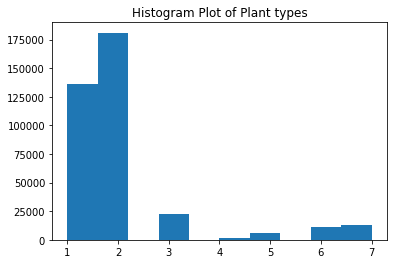

In [387]:
plt.hist(train_df_replaced['Plant_Type'])
plt.title('Histogram Plot of Plant types')
plt.show()

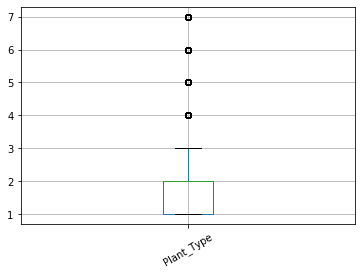

In [395]:
train_df_replaced.boxplot('Plant_Type',rot = 30)

Univariate Analysis of the target variable shows that there is a lot of imbalance in the data, the classes 1 and 2 i.e Assassin Wine and Ascomoid are present in large numbers as opposed to other classes. In the box plot we can see that apart from the first two classes the rest are shown as outliers which is clearly not the case here, they are just classes that are not frequent denoting that the dataset is unbalanced.

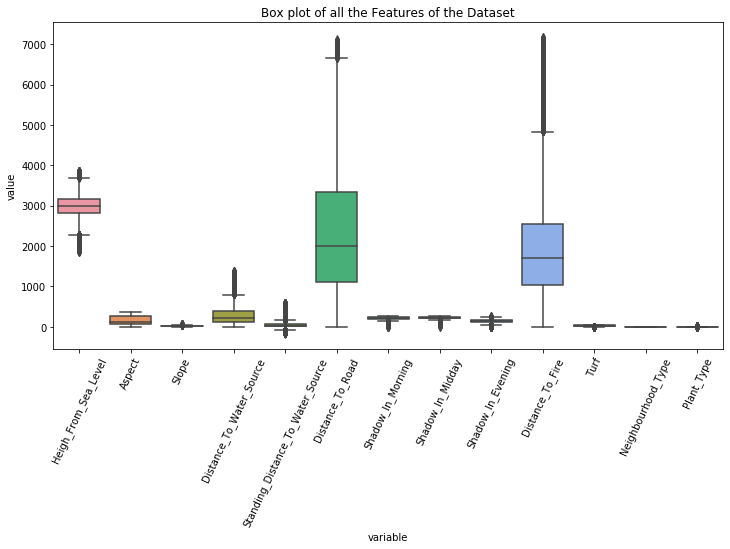

In [411]:

plt.figure(figsize=(12, 6))

ax = sns.boxplot(x="variable", y="value", data=pd.melt(train_df_replaced))
plt.setp(ax.get_xticklabels(), rotation=65)
plt.title("Box plot of all the Features of the Dataset")
plt.show()


The Boxplot shows that the are no obvious outliers in the features present, there are well within the range of values given in the data dictionary.

#### Bivariate Analysis

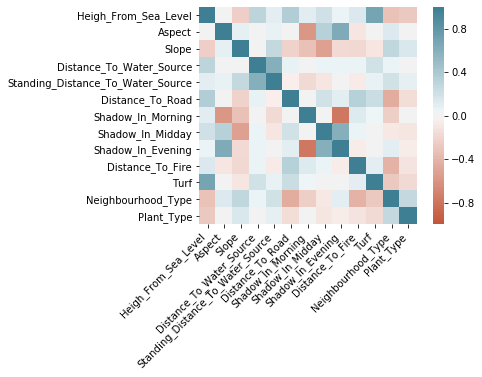

In [393]:
corr = train_df_replaced.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

This Correlation plot shows that higher Correlation with the target variable, of more than 0.5, can be observed in 6 other independent variables. This confirms that we can perform dimensional reduction on the data. Since not all of the independent variables are directly correlated to the target variable.

#### Key segments for all the plants (train + test) based on the average sunlight and their distance from waterbody 

In [359]:
full_ds = train_df_replaced.append(test_df_rep)
full_ds.head()

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type
0,2984,87,10,234,62,3700,235,224.0,119,2751,29,1,2
1,3021,283,31,630,372,2155,122,224.0,234,1519,13,3,2
2,3357,164,14,618,151,1410,232,244.0,140,1866,32,3,1
3,2787,272,16,150,40,2024,176,243.0,206,957,31,3,2
4,3011,135,2,576,95,5550,222,238.0,151,1524,29,1,2


In [384]:
plant_labels = train_df['Plant_Type'].unique()
avg_water_dist_list = []
avg_sun_dur_list = []
for i in range(1,8):
    avg_water_dist_list.append(np.mean(full_ds[full_ds['Plant_Type']==(i)]['Distance_To_Water_Source']))
    
for i in range(1,8):
    avg_sun_dur_list.append(np.mean(full_ds[full_ds['Plant_Type']==(i)]['Shadow_In_Morning'])+np.mean(full_ds[full_ds['Plant_Type']==(i)]['Shadow_In_Evening'])+np.mean(full_ds[full_ds['Plant_Type']==(i)]['Shadow_In_Midday']))
    


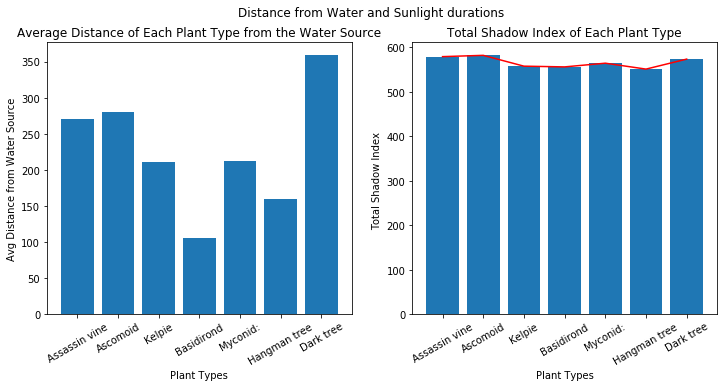

In [417]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,5))
fig.suptitle('Distance from Water and Sunlight durations')

ax1.set_title('Average Distance of Each Plant Type from the Water Source')
ax1.bar(plant_labels,avg_water_dist_list)
ax1.set(xlabel = 'Plant Types',ylabel = 'Avg Distance from Water Source')
ax1.tick_params(axis='x',  rotation=30)

ax2.set_title('Total Shadow Index of Each Plant Type')
ax2.bar(plant_labels,avg_sun_dur_list)
ax2.set(xlabel = 'Plant Types',ylabel = 'Total Shadow Index ')
ax2.tick_params(axis='x', rotation=30)
ax2.plot(avg_sun_dur_list,color='red')



From the analysis we can infer the folowing insights about the different plant types to identify which segments of plants are getting enough sunlight and water vs which ones are not:

|   Plant_Type  | Distance from Water   |  Sunglight Duration
|-------------  |-----------------------|------------------------- |
| Assassin Vine | Gets enough Water    | Gets the least Sunlight  |
|   Ascomoid    | Gets enough Water    | Gets the most Sunlight |
|   Kelpie      | Gets less Water       | Gets the least Sunlight  |
|   Basidirond  | Gets the least Water  | Gets enough Sunlight  |
|   Myconid     | Gets less Water       | Gets enough Sunlight  |
| Hangman Tree  | Gets less Water       | Gets the least Sunlight  |
|  Dark Tree    | Gets the most Water   | Gets the most Sunlight  |
 
#### Insights from EDA

1. The target variable analysis shows that the data is imbalanced in nature, so machine learning models to be chosen should be based on this important fact.
2. The Dataset did not contain much Null values and the outliers are not that significant as seen from the box plot of the dataset.
3. The dataset is eligible for dimensional reduction because there are many indepedent variables not correlated to the target variable.
4. Also from the EDA we could identify which plant types are getting enough sunlight and water vs which ones are not. 

### Data Preparation for Predictive Modeling


In [ ]:
target_train = train_df_replaced['Plant_Type']
train_df_replaced = train_df_replaced.drop(['Plant_Type'],axis = 1)
train_df_replaced.shape


In [ ]:
target_test = test_df_rep['Plant_Type']
test_df_rep = test_df_rep.drop(['Plant_Type'],axis = 1)
test_df_rep.shape

Normalizing the scale and applying PCA to obtain principal features/variables

In [255]:
pca = PCA(.95)
scaler = StandardScaler()
scaler.fit(train_df_replaced)
train_df_replaced = scaler.transform(train_df_replaced)

pca.fit(train_df_replaced)
train_pca_df = pca.transform(train_df_replaced)
train_pca_df.shape

(371776, 9)

In [256]:
scaler = StandardScaler()
scaler.fit(test_df_rep)
test_df_rep = scaler.transform(test_df_rep)

pca.fit(test_df_rep)
test_pca_df = pca.transform(test_df_rep)
test_pca_df.shape

(93124, 9)

In [184]:
pca.n_components_ 

9

### Classification Model Predictions with hyperparameter tuning.

#### Applying KNN Model

KNN algorithm is not sensisitive to imbalance data, since it classifies the data based on the number of neighbours present. So this algorithm would work well when classifying the data.

Text(0, 0.5, 'Mean Error')

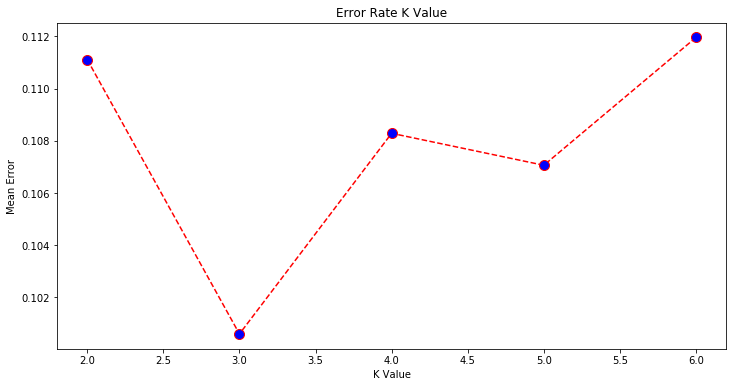

In [178]:
error = []
for i in range(2, 7):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_pca_df, target_train)
    pred_i = knn.predict(test_pca_df)
    error.append(np.mean(pred_i != target_test))
    
    
plt.figure(figsize=(12, 6))
plt.plot(range(2, 7), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

The best k value as per the error graph is 3, also increasing the K value further increases the error, this also explains the fact that there is imabalance in data due to which error increases when K value increases, with smaller number of K/neightbours the plant types that are not present in large numbers can be classified easily.

[[30692  3080     1     0    41     9   179]
 [ 2991 41655   196     2   233   183    25]
 [   12   253  5015    62    15   444     0]
 [    0    23   124   285     0    36     0]
 [   92   320    26     0  1091    10     0]
 [   29   273   418    18    11  1999     0]
 [  228    34     0     0     0     0  3019]]


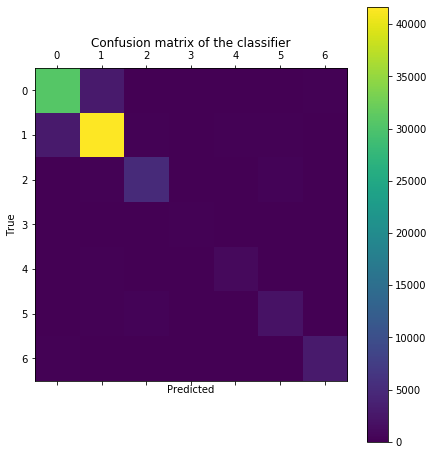

              precision    recall  f1-score   support

           1       0.90      0.90      0.90     34002
           2       0.91      0.92      0.92     45285
           3       0.87      0.86      0.87      5801
           4       0.78      0.61      0.68       468
           5       0.78      0.71      0.74      1539
           6       0.75      0.73      0.74      2748
           7       0.94      0.92      0.93      3281

    accuracy                           0.90     93124
   macro avg       0.85      0.81      0.83     93124
weighted avg       0.90      0.90      0.90     93124



In [391]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(train_pca_df, target_train)
test_df_pred = classifier.predict(test_pca_df)
cm = confusion_matrix(target_test, test_df_pred)
print(cm)
fig = plt.figure(figsize=(7, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(classification_report(target_test, test_df_pred))

#### Applying Bagging Model

Ensemble methods are one of the better approaches to deal with imbalanced data, since this method incorporates sampling of the dataset, which would take into consideration all the imbalanced classes as well.

[[30013  3800     0     0    37    10   142]
 [ 3279 41508   244     3   109   124    18]
 [    5   353  5084    62     9   288     0]
 [    0    20   115   295     0    38     0]
 [  100   527    30     0   874     8     0]
 [   10   370   559    20    10  1779     0]
 [  341    50     0     0     0     0  2890]]


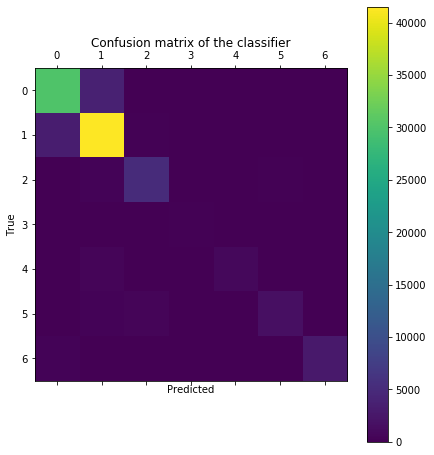

              precision    recall  f1-score   support

           1       0.89      0.88      0.89     34002
           2       0.89      0.92      0.90     45285
           3       0.84      0.88      0.86      5801
           4       0.78      0.63      0.70       468
           5       0.84      0.57      0.68      1539
           6       0.79      0.65      0.71      2748
           7       0.95      0.88      0.91      3281

    accuracy                           0.89     93124
   macro avg       0.85      0.77      0.81     93124
weighted avg       0.88      0.89      0.88     93124



In [263]:
clf_b = BaggingClassifier(n_estimators=15, random_state=0)
clf_b.fit(train_pca_df, target_train)
test_predict_b = clf_b.predict(test_pca_df)

cm = confusion_matrix(target_test, test_predict_b)
print(cm)
fig = plt.figure(figsize=(7, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(target_test, test_predict_b))

This model does take into consideration imabalance of the classes well, the random subsampling of the classes helps in distributing the training data equally to avoid bias, it tries its best to fit the test data as accurately as possible, if there were more hyperparameter tuning possible then that could have been taken into account. 
<br>
<b>Limitations:</b> Number of trees used was only 15 due to longer computation time on the training dataset. Other parameters like sampling data and methods can also be tuned with more computational power to get better results.

#### Applying Gradient Boosting Model

[[19148 14638     2     1    39     0   174]
 [ 9396 34960   646    19    48   162    54]
 [    2  1207  4205    89     0   298     0]
 [    0    35   260   124     0    49     0]
 [  149  1196    27     0   166     1     0]
 [   20   952  1304    61     0   411     0]
 [ 2012   205     3     0     3     0  1058]]


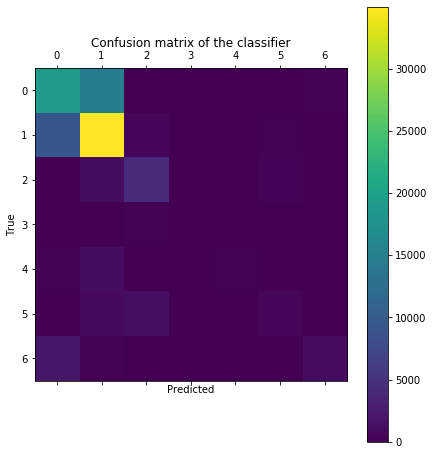

              precision    recall  f1-score   support

           1       0.62      0.56      0.59     34002
           2       0.66      0.77      0.71     45285
           3       0.65      0.72      0.69      5801
           4       0.42      0.26      0.33       468
           5       0.65      0.11      0.18      1539
           6       0.45      0.15      0.22      2748
           7       0.82      0.32      0.46      3281

    accuracy                           0.65     93124
   macro avg       0.61      0.41      0.46     93124
weighted avg       0.64      0.65      0.63     93124



In [262]:
clf_gb = GradientBoostingClassifier(n_estimators= 20)
clf_gb.fit(train_pca_df, target_train)
test_predict_gb = clf_gb.predict(test_pca_df)
cm = confusion_matrix(target_test, test_predict_gb)
print(cm)
fig = plt.figure(figsize=(7, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(target_test, test_predict_gb))

Upon looking at the KPIs of the model, we can see that this model doesn't perform very well, it is mainly because boosting is sensitive to over fitting and that is why it tends to attribute the plants from classes 7 to 1 and 2 as you can see from the confusion matrix.<br>
<b>Limitations:</b> Number of trees used was only 15 due to longer computation time on the training dataset.

### Comparison of models using performance KPIs, Training & Testing Time

Upon the comparision of the models chosen, the KPIs are accuracy, precision and recall 


|               | Accuracy   |  Precision and Recall |Training and Testing Time
|-------------  |-----------------------|------------------------- |------------------------- |
| KNN | Highest accuracy of 90%    | Good Precision and Recall averages | Fastest time in both training and testing |
|   Bagging    | Good accuracy of 89%   | Better Precision but lesser recall average | Average in between the other models |
|   Boosting      | Least accurate 65%       | Lowest rate in Precision and Recall averages | Boosting had taken the longest time |

### Final predictive model recommendation 

The model that performs best would be the KNN model in case of this classification problem because of the following reasons:
1. It gives the highest accuracy amongst all the models that were used.
2. It is quicker to implement, and it is lazy in evaluation making it efficient.
3. The computation time is not as long as the Ensemble methods used, even after hyperparameter tuning.
4. This model has very few limitations int terms of computation time and parameter tuning, so it overall performs well.
     